# Project Name: Credit Score Classification Case Study
# Project Description: 
### Banks and credit card companies calculate your credit score to determine your credit worthiness.
### It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness.
### Today banks and credit card companies use Machine Learning algorithms to classify all the customers in their database based on their credit history.
### Credit Score Classification:
### There are three credit scores that banks and credit card companies use to label their customers:

### 1.Good
### 2.Standard
### 3.Poor
### A person with a good credit score will get loans from any bank and financial institution. 
### For the task of Credit Score Classification, we need a labelled dataset with credit scores.

### To Solve this case study we will perform these steps:
### 1. Data Loading
### 2. Data Cleaning
### 3. Data Exploration (EDA)
### 4. Feature Transformation --> Changing Categorical data to Numerical
### 5. Splitting the Data to train and test the Model
### 6. Building the Model
### 7. Understanding the Model Parameter
### 8. Model Prediction
### 9. Measuring the Accuracy

In [95]:
# Load all the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle as pkl
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


In [96]:
## Load the data into the dataframe
df_info = pd.read_csv(r'C:\Users\kgupta\Desktop\train.csv',low_memory=False)

In [97]:
## Check the data
df_info.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [99]:
## Check the dtypes of the columns
df_info.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

# Drop the Columns which are not required

In [100]:
## Copy the data set and then drop the columns
df_copy = df_info.copy()
cols = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
        'Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
df_info.drop(columns = cols, inplace = True)

# Drop the Null Value columns

In [101]:
## Drop the null values from column 
df_info.dropna(subset = 'Num_of_Delayed_Payment',inplace = True)

In [102]:
## Check if there is any null value or not
df_info['Num_of_Delayed_Payment'] = df_info['Num_of_Delayed_Payment'].str.replace('-','')
df_info['Num_of_Delayed_Payment'] = df_info['Num_of_Delayed_Payment'].str.replace('_','')

# Filter and Transform the Columns

In [103]:
df_info =  df_info[df_info['Payment_Behaviour'] != '!@9#%8']

In [104]:
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].replace(np.nan,0)

In [105]:
df_info['Monthly_Balance'].isnull().sum()

0

In [106]:
df_info.dropna(subset = ['Credit_History_Age'], inplace = True)

In [107]:
df_info.isnull().sum()

Age                       0
Occupation                0
Annual_Income             0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Outstanding_Debt          0
Credit_History_Age        0
Payment_of_Min_Amount     0
Total_EMI_per_month       0
Payment_Behaviour         0
Monthly_Balance           0
Credit_Score              0
dtype: int64

In [108]:
df_info['Age'] = df_info['Age'].str.replace('-','')
df_info['Age'] = df_info['Age'].str.replace('_','')

In [109]:
df_info['Age'] = df_info['Age'].astype('int')

In [110]:
df_info = df_info[df_info['Age'] <= 150]

In [111]:
df_info = df_info[df_info['Occupation'] != '_______']

In [112]:
df_info['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [113]:
df_info['Annual_Income'] = df_info['Annual_Income'].str.replace('_','')

In [114]:
df_info['Delay_from_due_date'] = df_info['Delay_from_due_date'].astype('str').str.replace('-','')

In [115]:
df_info['Delay_from_due_date'] = df_info['Delay_from_due_date'].astype('int')

In [116]:
df_info['Num_of_Delayed_Payment'] = df_info['Num_of_Delayed_Payment'].astype('int')

In [117]:
df_info['Outstanding_Debt'] = df_info['Outstanding_Debt'].str.replace('_','')

In [118]:
df_info['Outstanding_Debt'] = df_info['Outstanding_Debt'].astype('float')

In [119]:
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.replace('Years and','')
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.replace('Months','')
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.replace('  ','.')
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.strip()

In [120]:
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].astype('float')
save_data = df_info.copy()

In [121]:
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].str.replace('NM','0')
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].str.replace('No','1')
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].str.replace('Yes','2')

In [122]:
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].astype('int')

In [123]:
df_info['Total_EMI_per_month'] = df_info['Total_EMI_per_month'].astype('float')

In [124]:
df_info['Annual_Income'] = df_info['Annual_Income'].astype('float')

In [125]:
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('High_spent_Large_value_payments','6')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('Low_spent_Large_value_payments','5')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('High_spent_Medium_value_payments','4')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('Low_spent_Medium_value_payments','3')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('High_spent_Small_value_payments','2')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('Low_spent_Small_value_payments','1')

In [126]:
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].str.replace('-','')

In [127]:
df_info = df_info[df_info['Monthly_Balance'] != '__333333333333333333333333333__'] 
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].fillna(0)

In [128]:
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].astype('float')
save_data['Credit_Sc'] = df_info['Credit_Score']

In [129]:
df_info['Credit_Score'] = df_info['Credit_Score'].str.replace('Poor','1')
df_info['Credit_Score'] = df_info['Credit_Score'].str.replace('Standard','2')
df_info['Credit_Score'] = df_info['Credit_Score'].str.replace('Good','3')

In [130]:
df_info['Credit_Score'] = df_info['Credit_Score'].astype('int')

In [131]:
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].astype('int')

# Calculating the Inter Quartile Range to determine outliers and remove the data which exceeds the threshold.

In [132]:
Q1 = df_info['Annual_Income'].quantile(0.25)
Q3 = df_info['Annual_Income'].quantile(0.75)
iqr = Q3 - Q1
Below_threshold = Q3 + (1.5 * iqr)
Above_threshold = Q1 - (1.5 * iqr)
df_info = df_info[df_info['Annual_Income'] < Below_threshold]
df_info = df_info[df_info['Annual_Income'] > Above_threshold]

# Transform the Categorical Variable to Numerical 

In [133]:
transformed_data = pd.get_dummies(df_info,drop_first = False, prefix= 'Occupation',columns = ['Occupation'] ,dtype = int)

In [136]:
transformed_data.head(10)

Age                         0
Annual_Income               0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Outstanding_Debt            0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Occupation_Accountant       0
Occupation_Architect        0
Occupation_Developer        0
Occupation_Doctor           0
Occupation_Engineer         0
Occupation_Entrepreneur     0
Occupation_Journalist       0
Occupation_Lawyer           0
Occupation_Manager          0
Occupation_Mechanic         0
Occupation_Media_Manager    0
Occupation_Musician         0
Occupation_Scientist        0
Occupation_Teacher          0
Occupation_Writer           0
dtype: int64

# Data Exploration - EDA

[]

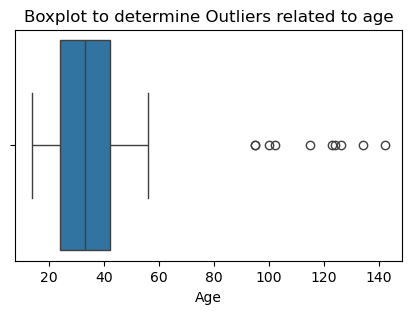

In [137]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Age')
ax.set_title('Boxplot to determine Outliers related to age')
plt.plot()

[]

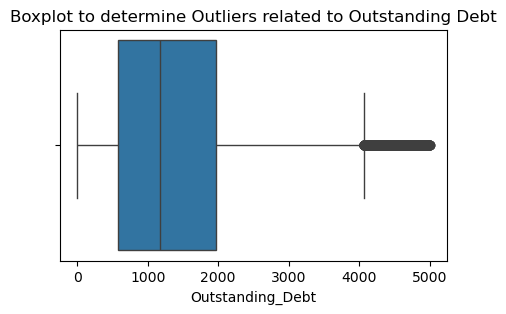

In [138]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Outstanding_Debt')
ax.set_title('Boxplot to determine Outliers related to Outstanding Debt')
plt.plot()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

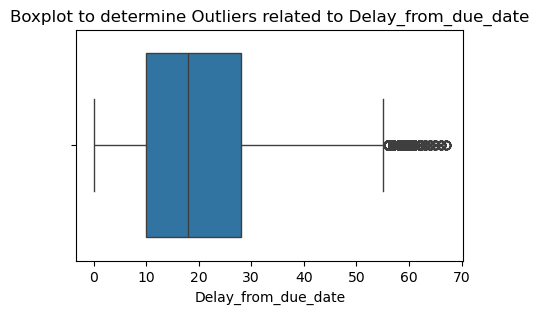

In [139]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Delay_from_due_date')
ax.set_title('Boxplot to determine Outliers related to Delay_from_due_date')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

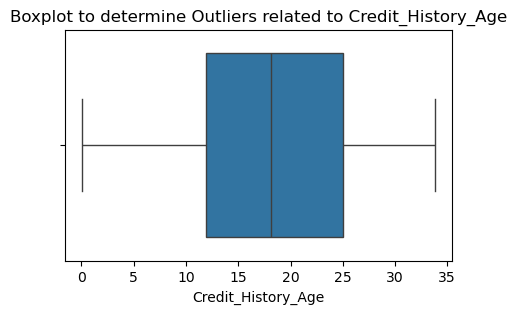

In [140]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Credit_History_Age')
ax.set_title('Boxplot to determine Outliers related to Credit_History_Age')
plt.plot

## No outliers in Credit_History_Age

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

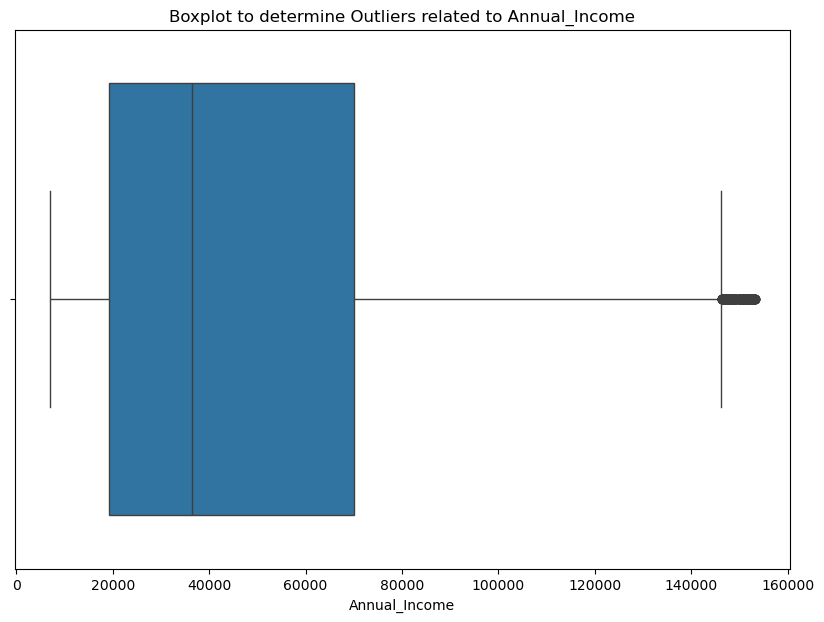

In [142]:
plt.figure(figsize = (10,7))
ax = sns.boxplot(transformed_data, x='Annual_Income')
ax.set_title('Boxplot to determine Outliers related to Annual_Income')
plt.plot

In [143]:
save_data['Annual_Income'] = save_data['Annual_Income'].astype('float')

In [144]:
df_info.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,68716.000000,68716.000000,68716.00000,68716.000000,68716.000000,68716.000000,68716.000000,68716.000000,68716.000000,68716.000000,68716.000000
mean,33.297209,48467.208952,21.33180,31.160996,1438.785786,18.255724,1.413077,1394.670407,3.171518,389.117636,1.879679
std,10.821304,35245.420453,14.87256,226.603089,1159.096913,8.302148,0.694568,8248.769795,1.779174,202.341199,0.672656
min,14.000000,7005.930000,0.00000,0.000000,0.230000,0.100000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,24.000000,19206.195000,10.00000,9.000000,573.770000,11.900000,1.000000,30.306460,1.000000,267.002564,1.000000
50%,33.000000,36456.720000,18.00000,14.000000,1177.430000,18.100000,2.000000,68.308988,3.000000,332.598010,2.000000
75%,42.000000,70015.360000,28.00000,18.000000,1972.220000,25.000000,2.000000,157.936527,5.000000,460.281335,2.000000
max,142.000000,153147.640000,67.00000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1432.042077,3.000000


[]

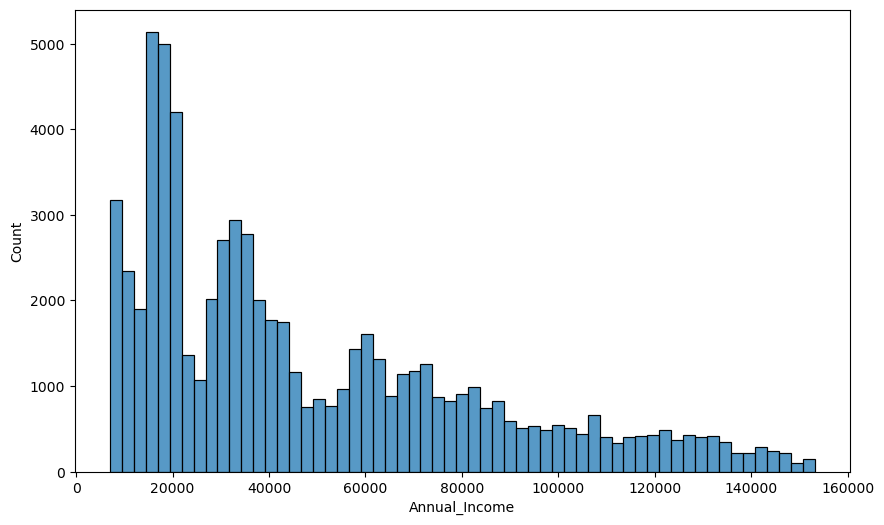

In [145]:
plt.figure(figsize = (10,6))
ax = sns.histplot(df_info, x='Annual_Income')
plt.plot()

C:\Users\kgupta\AppData\Local\Temp\ipykernel_1048\2249000962.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=35,horizontalalignment='right')


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

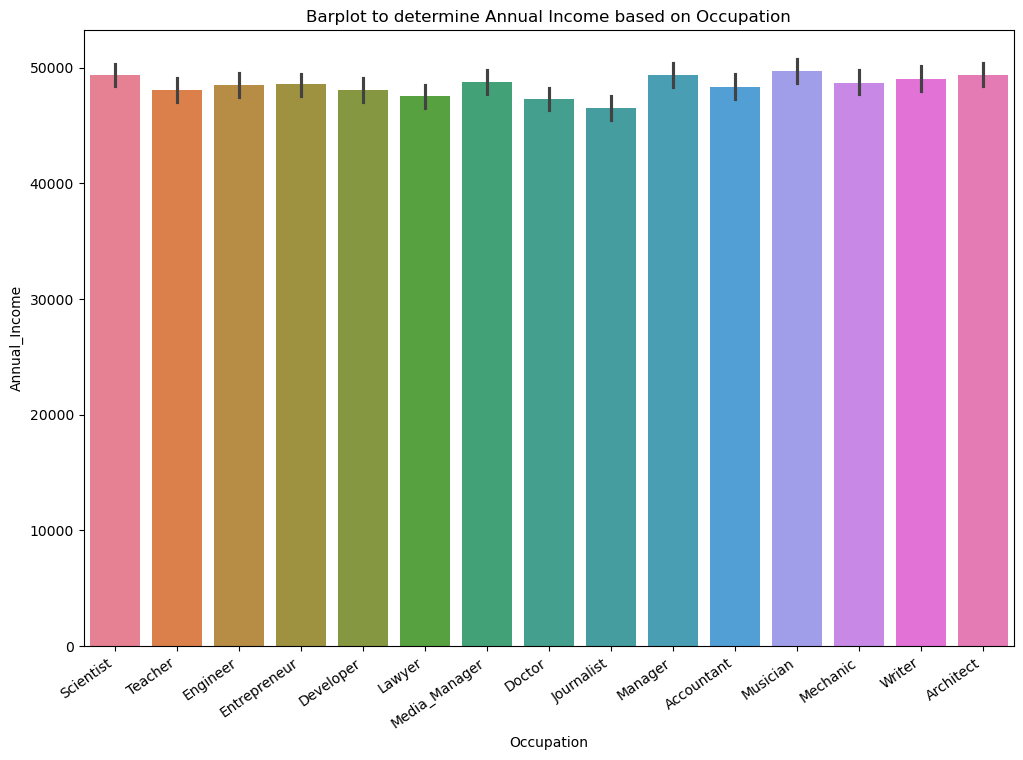

In [54]:
plt.figure(figsize = (12,8))
ax = sns.barplot(df_info, y='Annual_Income',x ='Occupation',hue='Occupation')
ax.set_title('Barplot to determine Annual Income based on Occupation')
ax.set_xticklabels(ax.get_xticklabels(),rotation=35,horizontalalignment='right')
plt.plot

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.092489,-0.173932,0.001452,-0.202927,0.234512,-0.162614,0.001625,0.032703,0.118809,0.161645
Annual_Income,0.092489,1.000000,-0.226572,0.002902,-0.262292,0.256845,-0.166756,0.007935,0.303121,0.638473,0.196459
Delay_from_due_date,-0.173932,-0.226572,1.000000,0.010818,0.571106,-0.485820,0.310656,-0.005186,-0.077928,-0.263583,-0.429095
Num_of_Delayed_Payment,0.001452,0.002902,0.010818,1.000000,0.008026,-0.008128,0.011389,-0.000418,0.007210,-0.000369,-0.007209
Outstanding_Debt,-0.202927,-0.262292,0.571106,0.008026,1.000000,-0.627661,0.304027,-0.007098,-0.094689,-0.313495,-0.384911
Credit_History_Age,0.234512,0.256845,-0.485820,-0.008128,-0.627661,1.000000,-0.366352,0.007219,0.091527,0.317287,0.387265
Payment_of_Min_Amount,-0.162614,-0.166756,0.310656,0.011389,0.304027,-0.366352,1.000000,-0.006173,-0.053083,-0.189754,-0.278367
Total_EMI_per_month,0.001625,0.007935,-0.005186,-0.000418,-0.007098,0.007219,-0.006173,1.000000,0.002261,0.001853,0.006645
Payment_Behaviour,0.032703,0.303121,-0.077928,0.007210,-0.094689,0.091527,-0.053083,0.002261,1.000000,0.470624,0.106244
Monthly_Balance,0.118809,0.638473,-0.263583,-0.000369,-0.313495,0.317287,-0.189754,0.001853,0.470624,1.000000,0.190623


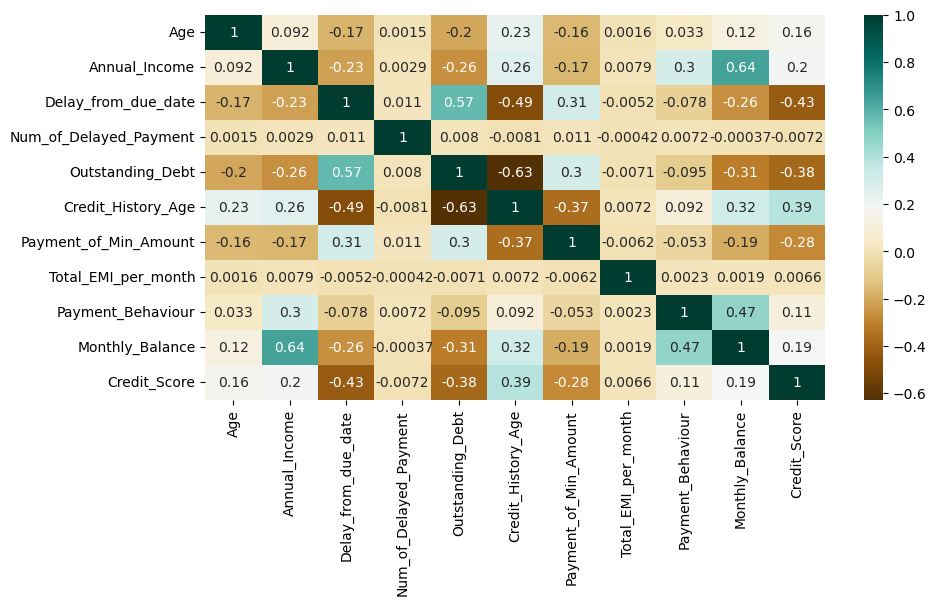

In [146]:
df_info_heatmap = df_info.copy()
df_info_heatmap.drop(columns ='Occupation',axis=1,inplace = True)
plt.figure(figsize=(10,5))
c=df_info_heatmap.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

# feature the columns and then split the data into train and test

In [153]:
X = transformed_data.copy()
X.drop(columns =['Credit_Score'],inplace = True)
y = np.array(transformed_data[['Credit_Score']])

X.isnull().sum()

Age                         0
Annual_Income               0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Outstanding_Debt            0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Occupation_Accountant       0
Occupation_Architect        0
Occupation_Developer        0
Occupation_Doctor           0
Occupation_Engineer         0
Occupation_Entrepreneur     0
Occupation_Journalist       0
Occupation_Lawyer           0
Occupation_Manager          0
Occupation_Mechanic         0
Occupation_Media_Manager    0
Occupation_Musician         0
Occupation_Scientist        0
Occupation_Teacher          0
Occupation_Writer           0
dtype: int64

# Normalize the Data using Standard Scaler

In [154]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.95157513, -0.832826  , -1.23260114, ...,  3.71396573,
        -0.27037132, -0.26050778],
       [-0.95157513, -0.832826  , -1.09812431, ...,  3.71396573,
        -0.27037132, -0.26050778],
       [-0.95157513, -0.832826  , -1.23260114, ...,  3.71396573,
        -0.27037132, -0.26050778],
       ...,
       [-0.76675317, -0.25076402,  0.11216709, ..., -0.26925397,
        -0.27037132, -0.26050778],
       [-0.76675317, -0.25076402, -0.22402497, ..., -0.26925397,
        -0.27037132, -0.26050778],
       [-0.76675317, -0.25076402,  0.38112073, ..., -0.26925397,
        -0.27037132, -0.26050778]])

In [155]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 42)

# Instantiate model.

In [156]:
rfc = RandomForestClassifier(random_state = 42)

# Fit the Data into Model

In [158]:
rfc.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=42)

# Predict the test data 

In [159]:
y_predict = rfc.predict(X_test)

# Evaluating the Model

In [180]:
print('The Precision Score is: {ps:.2f}' .format(ps = metrics.precision_score(y_test,y_predict,average = "weighted")))
print('The Recall Score is: {rc:.2f}' .format(rc = metrics.recall_score(y_test,y_predict,average = "weighted")))
print('The Accuracy Score is: {ac:.2f}' .format(ac = metrics.recall_score(y_test,y_predict,average = "weighted")))
print('The F1 Score is: {f1:.2f}' .format(f1 = metrics.f1_score(y_test,y_predict,average = "weighted")))

The Precision Score is: 0.77
The Recall Score is: 0.77
The Accuracy Score is: 0.77
The F1 Score is: 0.77


# Confusion Matrix

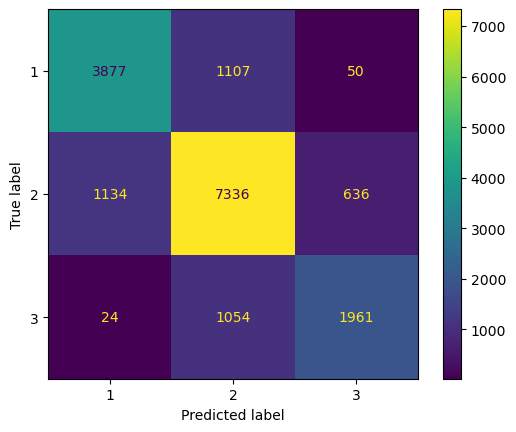

In [197]:
cm = metrics.confusion_matrix(y_test,y_predict,)
dsp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rfc.classes_)
dsp.plot()

# Print the Classification report in case of Multi-Class

In [203]:
print(metrics.classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           1     0.7700    0.7702    0.7701      5034
           2     0.7725    0.8056    0.7887      9106
           3     0.7408    0.6453    0.6898      3039

    accuracy                         0.7669     17179
   macro avg     0.7611    0.7404    0.7495     17179
weighted avg     0.7661    0.7669    0.7657     17179

